In [66]:
from phl_courts_scraper.scrape import IncidentNumberScraper
import pandas as pd
import carto2gpd
import numpy as np
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from loguru import logger
import time
import json

In [2]:
def replace_missing_geometries(df):
    """
    Utility function to replace missing geometries with empty Point() objects.
    """
    from shapely.geometry import Point

    mask = df.geometry.isnull()
    empty = pd.Series(
        [Point() for i in range(mask.sum())], index=df.loc[mask, "geometry"].index
    )
    df.loc[mask, "geometry"] = empty

    return df

In [59]:

# data = (
#     replace_missing_geometries(
#         carto2gpd.get("https://phl.carto.com/api/v2/sql", "shootings")
#     )
#     .to_crs(epsg=2272)
#     .assign(
#         time=lambda df: df.time.replace("<Null>", np.nan).fillna("00:00:00"),
#         date=lambda df: pd.to_datetime(
#             df.date_.str.slice(0, 10).str.cat(df.time, sep=" ")
#         ),
#         year=lambda df: df.date.dt.year,
#         dayofyear=lambda df: df.date.dt.dayofyear,
#         month=lambda df: df.date.dt.month
#     )
#     .drop(labels=["point_x", "point_y", "date_", "time", "objectid"], axis=1)
#     .sort_values("date", ascending=False)
#     .reset_index(drop=True)
# )

In [71]:
data = pd.read_csv("shootings.csv", index_col=0, dtype={'dc_key':str})

In [124]:
# Initialize the driver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

# Return the scraper
scraper = IncidentNumberScraper(driver)

[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183


[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/85.0.4183.87/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/nicholashand/.wdm/drivers/chromedriver/mac64/85.0.4183.87]


In [73]:
#results = json.load(open("./ujs_results.json"))

In [ ]:
%%time

N = len(data)
for i in range(N):
    if str(i) not in results and i not in results:
        #if i % 50 == 0:
        logger.info(i)
        dc_key = data.iloc[i]['dc_key']
        if len(dc_key) == 12:
            results[i] = scraper.scrape(dc_key[2:])
            time.sleep(5)

2020-08-28 09:54:05.707 | INFO     | __main__:<module>:5 - 787
2020-08-28 09:54:05.710 | INFO     | __main__:<module>:5 - 916
2020-08-28 09:54:05.712 | INFO     | __main__:<module>:5 - 1051
2020-08-28 09:54:05.714 | INFO     | __main__:<module>:5 - 1104
2020-08-28 09:54:05.716 | INFO     | __main__:<module>:5 - 1125
2020-08-28 09:54:05.718 | INFO     | __main__:<module>:5 - 1448
2020-08-28 09:54:05.720 | INFO     | __main__:<module>:5 - 1529
2020-08-28 09:54:05.721 | INFO     | __main__:<module>:5 - 1811
2020-08-28 09:54:05.723 | INFO     | __main__:<module>:5 - 2281
2020-08-28 09:54:05.724 | INFO     | __main__:<module>:5 - 2319
2020-08-28 09:54:05.725 | INFO     | __main__:<module>:5 - 2374
2020-08-28 09:54:05.726 | INFO     | __main__:<module>:5 - 2396
2020-08-28 09:54:05.727 | INFO     | __main__:<module>:5 - 2493
2020-08-28 09:54:05.734 | INFO     | __main__:<module>:5 - 2585
2020-08-28 09:54:05.736 | INFO     | __main__:<module>:5 - 2796
2020-08-28 09:54:11.365 | INFO     | __mai

In [110]:
max(map(int, results.keys()))

1721

In [48]:
ages = []
for i in results:
    r = results[i]
    if r is not None:
        dob = r[0]['date_of_birth']
        year = float(dob.split("/")[-1])
        ages.append(2020-year)

In [49]:
from matplotlib import pyplot as plt

(array([10., 23., 17., 21.,  9.,  2.,  9.,  3.,  2.,  5.,  3.,  1.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([16. , 19.6, 23.2, 26.8, 30.4, 34. , 37.6, 41.2, 44.8, 48.4, 52. ,
        55.6, 59.2, 62.8, 66.4, 70. , 73.6, 77.2, 80.8, 84.4, 88. ]),
 <BarContainer object of 20 artists>)

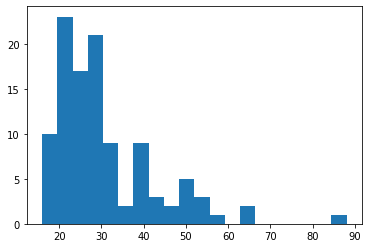

In [52]:
plt.hist(ages, bins=20)

In [87]:
import requests

In [88]:
PORTAL_URL = "https://ujsportal.pacourts.us/DocketSheets/MC.aspx"

In [95]:
driver.get_log('browser')

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=60348): Max retries exceeded with url: /session/67594d2e5d855448efd2979c7df74860/log (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1223ab040>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [45]:
len([i for i in results if results[i] is not None])

108

In [25]:
len([r for r in results if r is not None ])

4

In [28]:
random.iloc[2]

geometry             POINT (2713242.15874236 262736.8635225399)
cartodb_id                                                 5047
year                                                       2017
dc_key                                             201715060375
code                                                       0411
race                                                          B
sex                                                           M
age                                                          48
wound                                                multi/head
officer_involved                                              N
offender_injured                                              N
offender_deceased                                             N
location                                 1000 BLOCK Harrison St
latino                                                        0
dist                                                         15
inside                                  

In [54]:
import json

In [56]:
data.to_csv("shootings.csv")

In [58]:
json.dump(results, open("ujs_results.json", "w"))